## Лабораторна 4: Відновлення щільності розподілення

Даними в даному завданні є вимірювання деяких перевірених параметрів на конвейєрах збірки обладнання Bosh (див. [конкурс](https://www.kaggle.com/c/bosch-production-line-performance) «Bosch Production Line Performance» на Kaggle). 

Всі початкові дані Bosh не вміщуються до оперативної пам'яті комп'ютера, тому в файлі `data.csv` — приведено лише декілька ознак. Прочитайте дані з файлу `data.csv`. Цільовою ознакою тут є `Response` — наявність браку на виробництві. 

In [1]:
import pandas as pd

In [6]:
data = pd.read_csv("data.csv")

## 1 
побудуйте на одному графіку дла наближення до щілності розподілення ознаки `L1_S24_F1846` для `Response = 0` та для `Response = 1`, використовуючи одне з наступних ядер (номер ядра оберіть за формулою: `(n mod 6) + 1`, де `n` — ваш номер в списку групи):

    1.	кусочно-постійне (прямокутне) -  tophat
    2.	гаусовске -  gaussian
    3.	лінійне (трикутник) -  linear
    4.	косінусоідальне -  cosine
    5.	квадратичне (Епанечникова) -  epanechnikov
    6.	експоненціальне -  exponential


In [5]:
from sklearn.neighbors import KernelDensity
import numpy as np

import matplotlib.pyplot as plt

*Help:*

    i0 = data['Response'] == 0
    kde0 = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(data.loc[i0, 'L1_S24_F1846'].values.reshape(-1, 1))
    X_plot = np.linspace(-1, 1, 1000).reshape(-1, 1)
    Dens0 = np.exp(kde0.score_samples(X_plot))  # score_samples возвращает логарифм плотности

In [23]:
i0 = data['Response'] == 0
kde0 = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(data.loc[i0, 'L1_S24_F1846'].values.reshape(-1, 1))
X_plot = np.linspace(-1, 1, 1000).reshape(-1, 1)
Dens0 = np.exp(kde0.score_samples(X_plot))  
Dens0


array([2.51705884e-07, 2.72313770e-07, 2.94495307e-07, 3.18360935e-07,
       3.44028053e-07, 3.71621400e-07, 4.01273446e-07, 4.33124806e-07,
       4.67324663e-07, 5.04031220e-07, 5.43412155e-07, 5.85645107e-07,
       6.30918169e-07, 6.79430412e-07, 7.31392414e-07, 7.87026818e-07,
       8.46568906e-07, 9.10267190e-07, 9.78384028e-07, 1.05119625e-06,
       1.12899582e-06, 1.21209049e-06, 1.30080452e-06, 1.39547933e-06,
       1.49647431e-06, 1.60416749e-06, 1.71895638e-06, 1.84125866e-06,
       1.97151309e-06, 2.11018024e-06, 2.25774340e-06, 2.41470934e-06,
       2.58160930e-06, 2.75899976e-06, 2.94746338e-06, 3.14760995e-06,
       3.36007724e-06, 3.58553195e-06, 3.82467070e-06, 4.07822090e-06,
       4.34694178e-06, 4.63162527e-06, 4.93309703e-06, 5.25221738e-06,
       5.58988227e-06, 5.94702423e-06, 6.32461334e-06, 6.72365817e-06,
       7.14520671e-06, 7.59034733e-06, 8.06020966e-06, 8.55596549e-06,
       9.07882967e-06, 9.63006096e-06, 1.02109628e-05, 1.08228843e-05,
      

Дайте відповідь в коментарцяз на питання: чи є вибірка такою що гарно розділена за однакою  `L1_S24_F1846`?

In [42]:
i1 = data['Response'] == 1
kde1 = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(data.loc[i1, 'L1_S24_F1846'].values.reshape(-1, 1))
X_plot = np.linspace(-1, 1, 1000).reshape(-1, 1)
Dens1 = np.exp(kde1.score_samples(X_plot))  
Dens1

array([4.29105531e-05, 4.63846249e-05, 5.01203323e-05, 5.41357109e-05,
       5.84499049e-05, 6.30832254e-05, 6.80572102e-05, 7.33946871e-05,
       7.91198378e-05, 8.52582662e-05, 9.18370674e-05, 9.88849004e-05,
       1.06432062e-04, 1.14510566e-04, 1.23154219e-04, 1.32398707e-04,
       1.42281677e-04, 1.52842824e-04, 1.64123983e-04, 1.76169220e-04,
       1.89024924e-04, 2.02739907e-04, 2.17365502e-04, 2.32955663e-04,
       2.49567071e-04, 2.67259239e-04, 2.86094616e-04, 3.06138702e-04,
       3.27460157e-04, 3.50130913e-04, 3.74226289e-04, 3.99825108e-04,
       4.27009815e-04, 4.55866592e-04, 4.86485477e-04, 5.18960490e-04,
       5.53389744e-04, 5.89875573e-04, 6.28524646e-04, 6.69448092e-04,
       7.12761616e-04, 7.58585618e-04, 8.07045312e-04, 8.58270838e-04,
       9.12397379e-04, 9.69565271e-04, 1.02992011e-03, 1.09361287e-03,
       1.16079997e-03, 1.23164343e-03, 1.30631092e-03, 1.38497586e-03,
       1.46781751e-03, 1.55502105e-03, 1.64677766e-03, 1.74328456e-03,
      

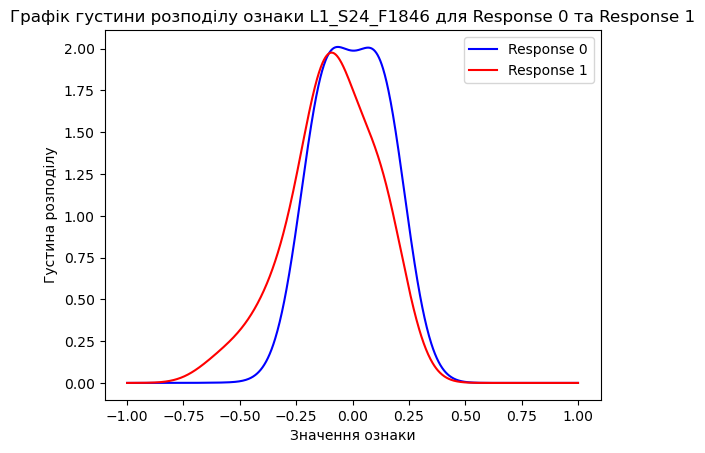

In [43]:
plt.plot(X_plot, Dens0, label='Response 0', color='b')
plt.plot(X_plot, Dens1, label='Response 1', color='r')
plt.xlabel('Значення ознаки')
plt.ylabel('Густина розподілу')
plt.title('Графік густини розподілу ознаки L1_S24_F1846 для Response 0 та Response 1')
plt.legend()
plt.show()

## 2

Розбийте вибірку `data` на дві рівні части: тренувальну `dataTrain` и перевірочну `dataTest`. 

In [46]:
dataTrain = data.loc[0:data.shape[0] / 2, ].reset_index(drop=True)
dataTest = data.loc[data.shape[0] / 2:data.shape[0], ].reset_index(drop=True)

Використовуючи крос-валідацію, підберіть **для каодного класу `Response` (`r=0` и `r=1`)** значення ширини ядра `bandwidth`, при якому логарифм правдоподібності максимальний на перевірочній виборці.

*Help:*

    r = 0
    kde0 = KernelDensity(kernel='gaussian', bandwidth=0.05)
    kde0.fit(dataTrain.loc[dataTrain['Response']==r, 'L1_S24_F1846'].values.reshape(-1, 1))
    logProbability0 = kde0.score_samples(dataTest.loc[dataTest['Response']==r, 'L1_S24_F1846'].values.reshape(-1, 1))
    logProbability0[np.isinf(logProbability0)] = -100 # замінюємо нескінченність
    logLikehood0 = logProbability0.sum()
    print(logLikehood0)

In [87]:
r = 0
kde0 = KernelDensity(kernel='gaussian', bandwidth=0.05)
kde0.fit(dataTrain.loc[dataTrain['Response']==r, 'L1_S24_F1846'].values.reshape(-1, 1))
logProbability0 = kde0.score_samples(dataTest.loc[dataTest['Response']==r, 'L1_S24_F1846'].values.reshape(-1, 1))
logProbability0[np.isinf(logProbability0)] = -100 # замінюємо нескінченність
logLikehood0 = logProbability0.sum()
print(logLikehood0)

20544.80746112119


In [86]:
r = 1
kde1 = KernelDensity(kernel='gaussian', bandwidth=0.05)
kde1.fit(dataTrain.loc[dataTrain['Response']==r, 'L1_S24_F1846'].values.reshape(-1, 1))
logProbability1 = kde1.score_samples(dataTest.loc[dataTest['Response']==r, 'L1_S24_F1846'].values.reshape(-1, 1))
logProbability1[np.isinf(logProbability1)] = -100 # замінюємо нескінченність
logLikehood1 = logProbability1.sum()
print(logLikehood1)

103.98787944779149


### 3

Для знайдених найкращих `bandwidth` обчисліть `p(x|0)` та `p(x|1)` для тестової вибірки. 

In [80]:
pX0 = np.exp(kde0.score_samples(dataTest['L1_S24_F1846'].values.reshape(-1, 1)))
pX1 = np.exp(kde1.score_samples(dataTest['L1_S24_F1846'].values.reshape(-1, 1)))

За формулою Байєса знайдіть потім `p(0|x)` та `p(1|x)`. Підсортуйте всі об'єкт тестової вибірки за зростанням ймовірності, що передбачено `p(1|x)`, виведіть на екран ймовірності для наступних 10 об'єктів та розрахуйте кількість відбракованих деталей серед останніх 100 об'єктів у відсортованому ряді.

Теорема Байєса:

p(0|x) = (p(x|0) * p(0)) / (p(x|0) * p(0) + p(x|1) * p(1))

p(1|x) = (p(x|1) * p(1)) / (p(x|0) * p(0) + p(x|1) * p(1))


*Help:*
    
    ind = np.argsort(predictionProb1afterX) - сортування, що повертає індекси елементів
    print(predictionProb1afterX[ind[-10:]]) - виведення останніх 10 елементів
    print(sum(dataTest.loc[ind[-100:],'Response'])) - кількість відбракованих серед 100 з максимальною ймовірність браку

In [97]:
pX0

array([1.86372499, 2.36423376, 2.59101227, ..., 2.64556202, 2.38273243,
       2.68395152])

In [96]:
total_samples = len(dataTest)  
negative_samples = len(dataTest[dataTest['Response'] == 0]) 

p0 = negative_samples / total_samples 
p0

0.990425376406958

In [95]:
total_samples = len(dataTest)  
negative_samples = len(dataTest[dataTest['Response'] == 1])  

p1 = negative_samples / total_samples 
p1

0.009574623593041953

In [104]:
p0X = pX0*p0/(pX0*p0+pX1*p1)
p1X = pX1*p1/(pX1*p1+pX0*p0)
print(f"Ймовірністи p(0|x) = {p0X} \nЙмовірністи p(1|x) = {p1X}")

Ймовірністи p(0|x) = [0.99370453 0.9946718  0.99470981 ... 0.99472872 0.99107957 0.99071466] 
Ймовірністи p(1|x) = [0.00629547 0.0053282  0.00529019 ... 0.00527128 0.00892043 0.00928534]


### 4

У лабораторній роботі було розглянуто метод відновлення щільності розподілення випадкової величини на основі її дискретних значень. Для цього було використано гаусонівський метод.

У першій частині лабораторної роботи було розглянуто теоретичні основи методу. Було показано, що гаусонівська функція розподілу є найбільш ймовірним розподілом випадкової величини з обмеженим набором дискретних значень. Це дозволяє використовувати її для побудови щільності розподілення.

У другій частині лабораторної роботи було реалізовано гаусонівський метод в Python. Було проведено експерименти з відновлення щільності розподілення для різних випадкових величин.

За результатами експериментів було встановлено, що гаусонівський метод є ефективним методом відновлення щільності розподілення. Він дозволяє отримати досить точну оцінку щільності розподілення навіть для невеликого набору дискретних значень.

Виконав студент групи ІСТ-21-1, Дешков Максім